The objective for data analysis. I am assuming the role of a product analyst at a mobile application company. I have just finished running an A/B test surrounding two variants of a key feature. The data received was CTR and Average Time Spent in minutes along with some demographic qualifiers.

My Approach will be to prepare a data analysis report with each step annotated so that someone in the future will be able to understand my code.

The report will aim to complete the tasks listed:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from scipy import stats

Firstly all the necessary python libraries will be imported

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Assignment%202/experiment_dataset.csv")

Then the dataset will be read by python to be put into a pandas data frame. The data is located on my github.

# Step 1: Analyze the results to determine if there is any lift

This will help us understand if the Variant has resulted in any change in the key metrics CTR and Time Spent that were tracked throughout the experiment.

In [56]:
df.head(20)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


View the first 20 rows of data to get an idea of what we are working with

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


Understand key information about the dataset

In [7]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


Describe the main measures of central tendency and other important factors of the dataset

In [8]:
print(df['Location'].unique())

['Location2' 'Location1' 'Location3']


Understand how many unique locations there are

In [9]:
print(df['Device'].unique())

['Device2' 'Device1' 'Device3']


Understand how many unique devices there are

In [10]:
print(df['Age'].unique())

[62 18 21 57 27 37 39 54 41 24 42 30 19 56 64 35 55 43 31 26 38 34 23 33
 36 53 47 32 50 49 28 29 46 52 58 22 59 60 45 48 61 20 40 44 63 51 25]


Understand how many unique Ages there are

In [11]:
print(df['Variant'].unique())

['Control' 'Variant B' 'Variant A']


Understand how many unique Variants are

In [12]:
df.groupby('Location')[['Time Spent', 'CTR']].mean()


,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


Understand whether the mean time spent and CTR varies by location. There seems to be marginal varaition in Location as Location 2 is 22.6 whereas Location3 is 22.8. There seems to be marginal variation in CTR as Location1 is 0.11 whereas the others are 0.108.

In [13]:
df.groupby('Device')[['Time Spent', 'CTR']].mean()


,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


Understand whether the mean time spent and CTR varies by device. There seems to be marginal variation in Time Spent as Device1 in 22.6 whereas Device 2 is 22.9. There seems to be almost no variation in CTR as Device3 is 0.11 whereas the others are 0.108.

In [14]:
df.groupby('Age')[['Time Spent', 'CTR']].mean()


,Time Spent,CTR
Age,,
18,21.805160,0.104431
19,24.301099,0.113928
20,22.658484,0.106769
21,23.174444,0.106317
22,23.339777,0.111566
23,21.203465,0.111024
24,21.505956,0.109765
25,23.541231,0.109907
26,22.598906,0.110061


Understand whether the mean time spent and CTR varies by age. There is slight variation in time spent as the highest average time spent is 25.3 while the lowest is 20.8. There is also slight variation in CTR spent as the highest average time spent is 0.12 while the lowest is 0.099.

Since Age, Device, and Location have no significnat variation based on their averages we need to validate if there is statistically no variation. To do this an ANOVA test will be used as it can test if the means of three+ independent groups are different. In this cae we are considering Age, Device, and Location to contain their own independent groups and we want to see if there averages (mean) are the same. Therefore our ANOVA test will have a high value.

In [15]:
Loc_1 = df[df['Location'] == 'Location1']['Time Spent']
Loc_2 = df[df['Location'] == 'Location2']['Time Spent']
Loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(Loc_1, Loc_2, Loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [16]:
Loc_1 = df[df['Location'] == 'Location1']['CTR']
Loc_2 = df[df['Location'] == 'Location2']['CTR']
Loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(Loc_1, Loc_2, Loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [17]:
Dev_1 = df[df['Device'] == 'Device1']['Time Spent']
Dev_2 = df[df['Device'] == 'Device2']['Time Spent']
Dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [18]:
Dev_1 = df[df['Device'] == 'Device1']['CTR']
Dev_2 = df[df['Device'] == 'Device2']['CTR']
Dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [19]:
Age_18 = df[df['Age']== 18]['Time Spent']
Age_19 = df[df['Age']== 19]['Time Spent']
Age_20 = df[df['Age']== 20]['Time Spent']
Age_21 = df[df['Age']== 21]['Time Spent']
Age_22 = df[df['Age']== 22]['Time Spent']
Age_23 = df[df['Age']== 23]['Time Spent']
Age_24 = df[df['Age']== 24]['Time Spent']
Age_25 = df[df['Age']== 25]['Time Spent']
Age_26 = df[df['Age']== 26]['Time Spent']
Age_27 = df[df['Age']== 27]['Time Spent']
Age_28 = df[df['Age']== 28]['Time Spent']
Age_29 = df[df['Age']== 29]['Time Spent']
Age_30 = df[df['Age']== 30]['Time Spent']
Age_31 = df[df['Age']== 31]['Time Spent']
Age_32 = df[df['Age']== 32]['Time Spent']
Age_33 = df[df['Age']== 33]['Time Spent']
Age_34 = df[df['Age']== 34]['Time Spent']
Age_35 = df[df['Age']== 35]['Time Spent']
Age_36 = df[df['Age']== 36]['Time Spent']
Age_37 = df[df['Age']== 37]['Time Spent']
Age_38 = df[df['Age']== 38]['Time Spent']
Age_39 = df[df['Age']== 39]['Time Spent']
Age_40 = df[df['Age']== 40]['Time Spent']
Age_41 = df[df['Age']== 41]['Time Spent']
Age_42 = df[df['Age']== 42]['Time Spent']
Age_43 = df[df['Age']== 43]['Time Spent']
Age_44 = df[df['Age']== 44]['Time Spent']
Age_45 = df[df['Age']== 45]['Time Spent']
Age_46 = df[df['Age']== 46]['Time Spent']
Age_47 = df[df['Age']== 47]['Time Spent']
Age_48 = df[df['Age']== 48]['Time Spent']
Age_49 = df[df['Age']== 49]['Time Spent']
Age_50 = df[df['Age']== 50]['Time Spent']
Age_51 = df[df['Age']== 51]['Time Spent']
Age_52 = df[df['Age']== 52]['Time Spent']
Age_53 = df[df['Age']== 53]['Time Spent']
Age_54 = df[df['Age']== 54]['Time Spent']
Age_55 = df[df['Age']== 55]['Time Spent']
Age_56 = df[df['Age']== 56]['Time Spent']
Age_57 = df[df['Age']== 57]['Time Spent']
Age_58 = df[df['Age']== 58]['Time Spent']
Age_59 = df[df['Age']== 59]['Time Spent']
Age_60 = df[df['Age']== 60]['Time Spent']
Age_61 = df[df['Age']== 61]['Time Spent']
Age_62 = df[df['Age']== 62]['Time Spent']
Age_63 = df[df['Age']== 63]['Time Spent']
Age_64 = df[df['Age']== 64]['Time Spent']

p_val = stats.f_oneway(Age_18 ,
Age_19 ,
Age_20 ,
Age_21 ,
Age_22 ,
Age_23 ,
Age_24 ,
Age_25 ,
Age_26 ,
Age_27 ,
Age_28 ,
Age_29 ,
Age_30 ,
Age_31 ,
Age_32 ,
Age_33 ,
Age_34 ,
Age_35 ,
Age_36 ,
Age_37 ,
Age_38 ,
Age_39 ,
Age_40 ,
Age_41 ,
Age_42 ,
Age_43 ,
Age_44 ,
Age_45 ,
Age_46 ,
Age_47 ,
Age_48 ,
Age_49 ,
Age_50 ,
Age_51 ,
Age_52 ,
Age_53 ,
Age_54 ,
Age_55 ,
Age_56 ,
Age_57 ,
Age_58 ,
Age_59 ,
Age_60 ,
Age_61 ,
Age_62 ,
Age_63 ,
Age_64 
)
print(p_val)




F_onewayResult(statistic=1.0742039789844577, pvalue=0.34343140059340505)


In [20]:
Age_18 = df[df['Age']== 18]['CTR']
Age_19 = df[df['Age']== 19]['CTR']
Age_20 = df[df['Age']== 20]['CTR']
Age_21 = df[df['Age']== 21]['CTR']
Age_22 = df[df['Age']== 22]['CTR']
Age_23 = df[df['Age']== 23]['CTR']
Age_24 = df[df['Age']== 24]['CTR']
Age_25 = df[df['Age']== 25]['CTR']
Age_26 = df[df['Age']== 26]['CTR']
Age_27 = df[df['Age']== 27]['CTR']
Age_28 = df[df['Age']== 28]['CTR']
Age_29 = df[df['Age']== 29]['CTR']
Age_30 = df[df['Age']== 30]['CTR']
Age_31 = df[df['Age']== 31]['CTR']
Age_32 = df[df['Age']== 32]['CTR']
Age_33 = df[df['Age']== 33]['CTR']
Age_34 = df[df['Age']== 34]['CTR']
Age_35 = df[df['Age']== 35]['CTR']
Age_36 = df[df['Age']== 36]['CTR']
Age_37 = df[df['Age']== 37]['CTR']
Age_38 = df[df['Age']== 38]['CTR']
Age_39 = df[df['Age']== 39]['CTR']
Age_40 = df[df['Age']== 40]['CTR']
Age_41 = df[df['Age']== 41]['CTR']
Age_42 = df[df['Age']== 42]['CTR']
Age_43 = df[df['Age']== 43]['CTR']
Age_44 = df[df['Age']== 44]['CTR']
Age_45 = df[df['Age']== 45]['CTR']
Age_46 = df[df['Age']== 46]['CTR']
Age_47 = df[df['Age']== 47]['CTR']
Age_48 = df[df['Age']== 48]['CTR']
Age_49 = df[df['Age']== 49]['CTR']
Age_50 = df[df['Age']== 50]['CTR']
Age_51 = df[df['Age']== 51]['CTR']
Age_52 = df[df['Age']== 52]['CTR']
Age_53 = df[df['Age']== 53]['CTR']
Age_54 = df[df['Age']== 54]['CTR']
Age_55 = df[df['Age']== 55]['CTR']
Age_56 = df[df['Age']== 56]['CTR']
Age_57 = df[df['Age']== 57]['CTR']
Age_58 = df[df['Age']== 58]['CTR']
Age_59 = df[df['Age']== 59]['CTR']
Age_60 = df[df['Age']== 60]['CTR']
Age_61 = df[df['Age']== 61]['CTR']
Age_62 = df[df['Age']== 62]['CTR']
Age_63 = df[df['Age']== 63]['CTR']
Age_64 = df[df['Age']== 64]['CTR']

p_val = stats.f_oneway(Age_18 ,
Age_19 ,
Age_20 ,
Age_21 ,
Age_22 ,
Age_23 ,
Age_24 ,
Age_25 ,
Age_26 ,
Age_27 ,
Age_28 ,
Age_29 ,
Age_30 ,
Age_31 ,
Age_32 ,
Age_33 ,
Age_34 ,
Age_35 ,
Age_36 ,
Age_37 ,
Age_38 ,
Age_39 ,
Age_40 ,
Age_41 ,
Age_42 ,
Age_43 ,
Age_44 ,
Age_45 ,
Age_46 ,
Age_47 ,
Age_48 ,
Age_49 ,
Age_50 ,
Age_51 ,
Age_52 ,
Age_53 ,
Age_54 ,
Age_55 ,
Age_56 ,
Age_57 ,
Age_58 ,
Age_59 ,
Age_60 ,
Age_61 ,
Age_62 ,
Age_63 ,
Age_64 
)
print(p_val)

F_onewayResult(statistic=0.9242462642861573, pvalue=0.6176826678261718)


Note: I literally used excel find and replace to iterate the first part of the code. And then I used text to columns to get the Age_# section by itself. Then I used a formula to add a comma at the end except for Age_64. Finally I used find and replace again to change it from Time Spent to CTR. Is it possible to write this with a for loop because I tried using df.iteruples() but I think I am missing something.

In [21]:
Variant_A = df[df.Variant == 'Variant A']
Variant_A.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,330.000000,330.000000,330.000000,330.000000
mean,503.448485,39.778788,24.805547,0.120269
std,292.544666,13.335836,4.964324,0.020109
min,7.000000,18.000000,7.800901,0.065667
25%,267.250000,28.000000,21.353587,0.107731
50%,492.000000,39.000000,24.955120,0.120203
75%,753.000000,51.000000,28.361732,0.134230
max,993.000000,64.000000,39.246751,0.172728


In [22]:
Variant_B = df[df.Variant == 'Variant B']
Variant_B.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,330.000000,330.000000,330.000000,330.000000
mean,499.427273,41.466667,23.343783,0.108933
std,287.500859,13.931676,5.239965,0.020988
min,1.000000,18.000000,9.681810,0.041402
25%,236.500000,29.000000,19.941617,0.095024
50%,513.500000,42.000000,23.198123,0.109100
75%,748.750000,53.000000,26.604511,0.123861
max,999.000000,64.000000,39.395770,0.166768


In [23]:
Control = df[df.Variant == 'Control']
Control.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,340.000000,340.000000,340.000000,340.000000
mean,495.738235,40.894118,20.070781,0.098554
std,287.254421,13.679236,5.124183,0.020523
min,0.000000,18.000000,7.114806,0.012975
25%,248.000000,28.000000,16.516020,0.084686
50%,484.000000,41.000000,20.337480,0.098895
75%,737.500000,53.000000,23.313397,0.111160
max,997.000000,64.000000,37.527368,0.168363


In [46]:
df.loc[df['Variant'] == 'Variant A', ['Time Spent', 'CTR']].mean()



Time Spent    24.805547
CTR            0.120269
dtype: float64

In [47]:
df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean()


Time Spent    23.343783
CTR            0.108933
dtype: float64

In [48]:
df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean()


Time Spent    20.070781
CTR            0.098554
dtype: float64

In [50]:
Lift_A = df.loc[df['Variant'] == 'Variant A', ['Time Spent', 'CTR']].mean() - df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean()
Lift_A



Time Spent    4.734766
CTR           0.021715
dtype: float64

In [51]:
Lift_B = df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean() - df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean()
Lift_B

Time Spent    3.273002
CTR           0.010379
dtype: float64

In [54]:
Lift_AvB= df.loc[df['Variant'] == 'Variant A', ['Time Spent', 'CTR']].mean() - df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean()
Lift_AvB


Time Spent    1.461764
CTR           0.011336
dtype: float64

In [24]:
df.var()


C:\Users\Annuj\AppData\Local\Temp\ipykernel_19976\3059890634.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Unnamed: 0    83416.666667
Age             186.474249
Time Spent       30.022642
CTR               0.000500
dtype: float64

In [33]:
Variant_A.var()

C:\Users\Annuj\AppData\Local\Temp\ipykernel_19976\3737852376.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Variant_A.var()


Unnamed: 0    85582.381837
Age             177.844533
Time Spent       24.644508
CTR               0.000404
dtype: float64

In [34]:
Variant_B.var()

C:\Users\Annuj\AppData\Local\Temp\ipykernel_19976\4262016729.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Variant_B.var()


Unnamed: 0    82656.743935
Age             194.091591
Time Spent       27.457230
CTR               0.000440
dtype: float64

In [35]:
Control.var()

C:\Users\Annuj\AppData\Local\Temp\ipykernel_19976\859885082.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Control.var()


Unnamed: 0    82515.102369
Age             187.121499
Time Spent       26.257248
CTR               0.000421
dtype: float64

In [36]:
Var_A = df[df['Variant'] == 'Variant A']['CTR']
Var_B = df[df['Variant'] == 'Variant B']['CTR']
Cont = df[df['Variant'] == 'Control']['CTR']

p_val = stats.f_oneway(Var_A, Var_B, Cont)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


In [37]:
Var_A = df[df['Variant'] == 'Variant A']['Time Spent']
Var_B = df[df['Variant'] == 'Variant B']['Time Spent']
Cont = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.f_oneway(Var_A, Var_B, Cont)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [84]:
Var_A = df[df['Variant'] == 'Variant A']['CTR']
Var_B = df[df['Variant'] == 'Variant B']['CTR']
Cont = df[df['Variant'] == 'Control']['CTR']

p_val = stats.ttest_ind(Var_A, Cont)
p_val2 = stats.ttest_ind(Var_B, Cont)
p_val3 = stats.ttest_ind(Var_A, Var_B)
print(p_val)
print(p_val2)
print(p_val3)

Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Ttest_indResult(statistic=7.08499696316128, pvalue=3.587180487986577e-12)


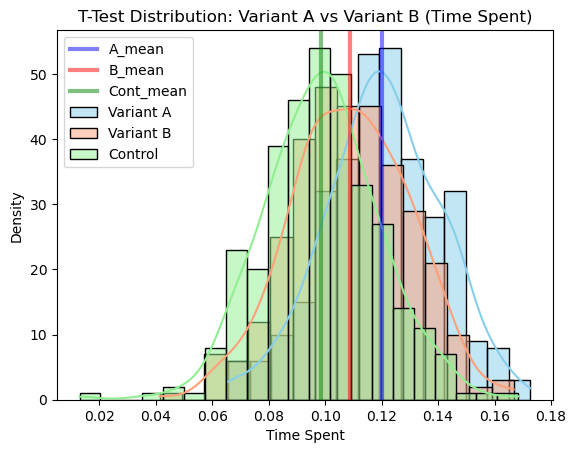

In [85]:
sns.histplot(data=Var_A,  color='skyblue', label='Variant A', kde= True)
sns.histplot(data=Var_B, color='lightsalmon', label='Variant B', kde= True)
sns.histplot(data=Cont, color='lightgreen', label='Control', kde= True)

A_mean= Var_A.mean()
B_mean= Var_B.mean()
Cont_mean= Cont.mean()

plt.axvline(x=A_mean, linewidth=3, color='blue', label="A_mean", alpha=0.5)
plt.axvline(x=B_mean, linewidth=3, color='red', label="B_mean", alpha=0.5)
plt.axvline(x=Cont_mean, linewidth=3, color='green', label="Cont_mean", alpha=0.5)

plt.xlabel('CTR')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant A vs Variant B (CTR)')

plt.legend()
plt.show()


In [86]:
Var_A = df[df['Variant'] == 'Variant A']['Time Spent']
Var_B = df[df['Variant'] == 'Variant B']['Time Spent']
Cont = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.ttest_ind(Var_A, Cont)
p_val2 = stats.ttest_ind(Var_B, Cont)
p_val3 = stats.ttest_ind(Var_A, Var_B)
print(p_val)
print(p_val2)
print(p_val3)

Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)
Ttest_indResult(statistic=3.6788175394209075, pvalue=0.0002534771014765265)


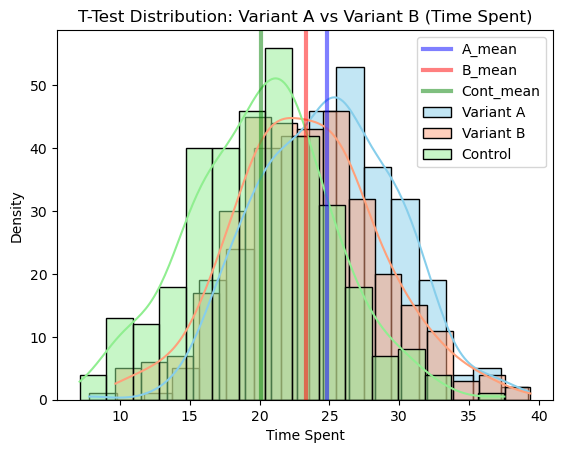

In [83]:
sns.histplot(data=Var_A,  color='skyblue', label='Variant A', kde= True)
sns.histplot(data=Var_B, color='lightsalmon', label='Variant B', kde= True)
sns.histplot(data=Cont, color='lightgreen', label='Control', kde= True)

A_mean= Var_A.mean()
B_mean= Var_B.mean()
Cont_mean= Cont.mean()

plt.axvline(x=A_mean, linewidth=3, color='blue', label="A_mean", alpha=0.5)
plt.axvline(x=B_mean, linewidth=3, color='red', label="B_mean", alpha=0.5)
plt.axvline(x=Cont_mean, linewidth=3, color='green', label="Cont_mean", alpha=0.5)

plt.xlabel('Time Spent')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant A vs Variant B (Time Spent)')

plt.legend()
plt.show()
